In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as smp
import pandas as pd
from IPython.display import HTML
from matplotlib import animation
import warnings
warnings.filterwarnings('ignore')    #suppress warnings
plt.rc('savefig', dpi=300)
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['animation.embed_limit'] = 2**4
from matplotlib.animation import PillowWriter

Horizontal position
* $x_1 = L_1 \sin(\theta_1)$
* $x_2 = L_1 \sin(\theta_1) + L_2 \sin(\theta_2)$
* ...
* $x_n = \sum L_i \sin(\theta_i)$

Vertical position
* $y_1 = -L_1 \cos(\theta_1)$
* $y_2 = -L_1 \cos(\theta_1)-L_2 \cos(\theta_2)$
*
* $y_n = -\sum L_i \cos(\theta_i)$

Lagrangian

$$\mathcal{L} = \sum_i \left( \frac{1}{2} m_i (\dot{x}_i^2+\dot{y}_i^2)- m_i g y_i \right)$$

In [2]:
N = 4

In [3]:
t, g = smp.symbols('t g')
ms = smp.symbols(f'm0:{N}')
Ls = smp.symbols(f'L0:{N}')
thetas = smp.symbols(f'theta0:{N}', cls=smp.Function)


In [4]:
thetas = [theta(t) for theta in thetas]
thetas_d = [smp.diff(theta) for theta in thetas]
thetas_dd = [smp.diff(theta_d) for theta_d in thetas_d]

In [5]:
thetas_dd[0]

Derivative(theta0(t), (t, 2))

In [6]:
xs = smp.symbols(f'x0:{N}', cls=smp.Function)
ys = smp.symbols(f'y0:{N}', cls=smp.Function)

In [7]:
def get_xn_yn():
    xs = []
    ys = []
    xn = Ls[0]*smp.cos(thetas[0])
    yn = -Ls[0]*smp.sin(thetas[0])
    xs.append(xn)
    ys.append(yn)
    for i in range(1,N):
        xn = xn + Ls[i]*smp.cos(thetas[i])
        yn = yn - Ls[i]*smp.sin(thetas[i])
        xs.append(xn)
        ys.append(yn)
    return xs, ys

In [8]:
xs, ys = get_xn_yn()

In [9]:
T = sum([1/2 * m * (smp.diff(x, t)**2 + smp.diff(y, t)**2) for (m,x,y) in zip(ms, xs, ys)])
T

0.5*m0*(L0**2*sin(theta0(t))**2*Derivative(theta0(t), t)**2 + L0**2*cos(theta0(t))**2*Derivative(theta0(t), t)**2) + 0.5*m1*((-L0*sin(theta0(t))*Derivative(theta0(t), t) - L1*sin(theta1(t))*Derivative(theta1(t), t))**2 + (-L0*cos(theta0(t))*Derivative(theta0(t), t) - L1*cos(theta1(t))*Derivative(theta1(t), t))**2) + 0.5*m2*((-L0*sin(theta0(t))*Derivative(theta0(t), t) - L1*sin(theta1(t))*Derivative(theta1(t), t) - L2*sin(theta2(t))*Derivative(theta2(t), t))**2 + (-L0*cos(theta0(t))*Derivative(theta0(t), t) - L1*cos(theta1(t))*Derivative(theta1(t), t) - L2*cos(theta2(t))*Derivative(theta2(t), t))**2) + 0.5*m3*((-L0*sin(theta0(t))*Derivative(theta0(t), t) - L1*sin(theta1(t))*Derivative(theta1(t), t) - L2*sin(theta2(t))*Derivative(theta2(t), t) - L3*sin(theta3(t))*Derivative(theta3(t), t))**2 + (-L0*cos(theta0(t))*Derivative(theta0(t), t) - L1*cos(theta1(t))*Derivative(theta1(t), t) - L2*cos(theta2(t))*Derivative(theta2(t), t) - L3*cos(theta3(t))*Derivative(theta3(t), t))**2)

In [10]:
V = sum([m*g*y for (m,y) in zip(ms, ys)])
V

-L0*g*m0*sin(theta0(t)) + g*m1*(-L0*sin(theta0(t)) - L1*sin(theta1(t))) + g*m2*(-L0*sin(theta0(t)) - L1*sin(theta1(t)) - L2*sin(theta2(t))) + g*m3*(-L0*sin(theta0(t)) - L1*sin(theta1(t)) - L2*sin(theta2(t)) - L3*sin(theta3(t)))

In [11]:
L=T-V
L

L0*g*m0*sin(theta0(t)) - g*m1*(-L0*sin(theta0(t)) - L1*sin(theta1(t))) - g*m2*(-L0*sin(theta0(t)) - L1*sin(theta1(t)) - L2*sin(theta2(t))) - g*m3*(-L0*sin(theta0(t)) - L1*sin(theta1(t)) - L2*sin(theta2(t)) - L3*sin(theta3(t))) + 0.5*m0*(L0**2*sin(theta0(t))**2*Derivative(theta0(t), t)**2 + L0**2*cos(theta0(t))**2*Derivative(theta0(t), t)**2) + 0.5*m1*((-L0*sin(theta0(t))*Derivative(theta0(t), t) - L1*sin(theta1(t))*Derivative(theta1(t), t))**2 + (-L0*cos(theta0(t))*Derivative(theta0(t), t) - L1*cos(theta1(t))*Derivative(theta1(t), t))**2) + 0.5*m2*((-L0*sin(theta0(t))*Derivative(theta0(t), t) - L1*sin(theta1(t))*Derivative(theta1(t), t) - L2*sin(theta2(t))*Derivative(theta2(t), t))**2 + (-L0*cos(theta0(t))*Derivative(theta0(t), t) - L1*cos(theta1(t))*Derivative(theta1(t), t) - L2*cos(theta2(t))*Derivative(theta2(t), t))**2) + 0.5*m3*((-L0*sin(theta0(t))*Derivative(theta0(t), t) - L1*sin(theta1(t))*Derivative(theta1(t), t) - L2*sin(theta2(t))*Derivative(theta2(t), t) - L3*sin(theta3(t))

In [12]:
LEs = [smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t) for (the, the_d) in zip(thetas, thetas_d)]
LEs = [LE.expand() for LE in LEs]

In [ ]:
sols = smp.solve(LEs, thetas_dd,
                simplify=False, rational=False)

In [14]:
dzdts_f = [smp.lambdify((t, g, *ms, *Ls, *thetas, *thetas_d), sols[theta_dd]) for theta_dd in thetas_dd]
dthedts_f = [smp.lambdify(theta_d, theta_d) for theta_d in thetas_d]

In [15]:
ms_n = np.ones(N)
Ls_n = np.ones(N)
thetas_n = np.random.randn(N)
thetas_d_n = np.random.randn(N)

In [16]:
dzdts_f[3](2, 9.81, *ms_n, *Ls_n, *thetas_n, *thetas_d_n)

2.071743919925647

In [17]:
def dSdt(S, t, g, ms, Ls):
    thetas_n = S[0:int(len(S)/2)]
    thetas_d_n = S[int(len(S)/2):]
    list1 = [dthedt_f(theta_d_n) for (dthedt_f, theta_d_n) in zip(dthedts_f, thetas_d_n)]
    list2 = [dzdt_f(t, g, *ms, *Ls, *thetas_n, *thetas_d_n) for dzdt_f in dzdts_f]
    return  list1+list2

In [18]:
dSdt(list(thetas_n)+list(thetas_d_n), 2, 9.81, ms_n, Ls_n)

[-0.18195482828743026,
 0.9656739916352629,
 -2.0271336407953564,
 0.4515796287981655,
 3.9663932527151977,
 10.7955059661379,
 -0.39428958666161495,
 2.071743919925647]

In [19]:
t = np.linspace(0, 20, 100)
g = 9.81
ms = [3,2,1,1]
Ls = [5,1,1,1]
ans = odeint(dSdt, y0=np.random.randn(2*N), t=t, args=(g, ms, Ls))

In [20]:
pd.DataFrame(ans.T)

0         1         2         3         4         5         6   \
0 -0.198359 -0.267165 -0.258060 -0.165106  0.018162  0.292531  0.691045   
1  0.134053  0.382655  0.688087  1.037476  1.315475  1.296582  0.559470   
2  0.658222  0.650662  0.628237  0.594794  0.585076  0.625443  0.816242   
3 -0.139696 -0.313741 -0.478945 -0.604662 -0.675072 -0.699828 -0.303020   
4 -0.535643 -0.148971  0.244981  0.681626  1.130848  1.603720  2.311692   
5  1.166872  1.343093  1.672727  1.690570  0.880060 -1.398938 -5.156753   
6  0.023927 -0.070669 -0.156456 -0.137082  0.051633  0.457051 -0.169818   
7 -0.897680 -0.849596 -0.752487 -0.476796 -0.241737  0.096012  6.339397   

         7         8          9   ...         90         91         92  \
0  1.092666  1.398944   1.708124  ...   1.601221   1.777273   1.995851   
1  0.455090  1.356736   1.747723  ... -24.370610 -23.404002 -22.362472   
2  0.023825  0.337766   2.337406  ...  -0.157382   2.620669   2.020235   
3  1.474566  2.414937   1.518700  ...  15.557121  19.747689  24.413636   
4  1.668145  1.412821   1.735000  ...   1.560908   0.490371   1.151688   
5  3.129714  4.686286   1.140043  ...   2.762727   6.128543   8.502156   
6 -2.166493  5.600482  10.275265  ...  17.166887  -0.519986   5.222754   
7  6.467510  2.404044  -8.150884  ...  19.544144  19.824950  23.960191   

          93         94         95         96         97         98         99  
0   2.256741   2.521290   2.751238   2.783546   2.797257   2.943288   2.589846  
1 -21.783912 -21.574694 -22.652520 -22.030740 -19.859013 -17.227260 -15.127413  
2   1.220401   1.383538   3.079894   1.951141   2.341991   1.240852   2.651611  
3  28.956308  33.795507  38.641382  42.699089  45.606036  46.437114  44.638000  
4   1.298786   1.035413   1.059954  -0.502488   0.926457  -0.803058  -1.768854  
5  -2.525311  -6.284731  -4.591689   8.990532  13.115967  13.103564   1.534186  
6   7.223252  -9.123989   5.024963   2.262621   0.704619  -9.621170  14.886005  
7  24.261683  22.074432  21.852158  17.401422  10.917083  -5.591077  -1.359182  

[8 rows x 100 columns]

In [21]:
the1 = ans.T[0]
the2 = ans.T[2]
the3 = ans.T[4]
the4 = ans.T[6]

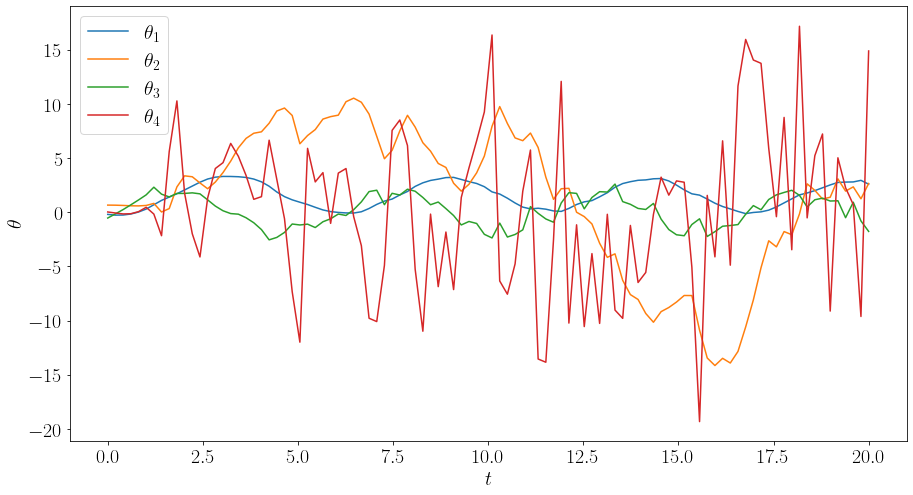

In [24]:
plt.plot(t, the1, label=r'$\theta_1$')
plt.plot(t, the2, label=r'$\theta_2$')
plt.plot(t, the3, label=r'$\theta_3$')
plt.plot(t, the4, label=r'$\theta_4$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend()
plt.show()

In [35]:
def get_x1y1x2y2x3y3x4y4(t, the1, the2, the3, the4, L1, L2, L3, L4):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2),
            L1*np.sin(the1) + L2*np.sin(the2) + L3*np.sin(the3) ,
           -L1*np.cos(the1) - L2*np.cos(the2) - L3*np.cos(the3),
           L1*np.sin(the1) + L2*np.sin(the2) + L3*np.sin(the3) + L4*np.sin(the4),
           -L1*np.cos(the1) - L2*np.cos(the2) - L3*np.cos(the3) - L4*np.cos(the4))

x1, y1, x2, y2, x3, y3, x4, y4 = get_x1y1x2y2x3y3x4y4(t, ans.T[0], ans.T[2], ans.T[4], ans.T[6], 1, 0.75, 0.5, 0.25)

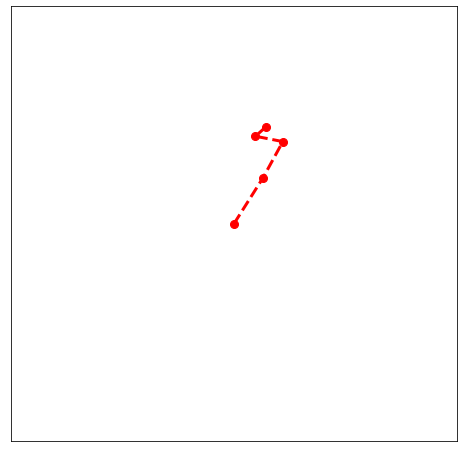

In [41]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i], x3[i], x4[i]], [0, y1[i], y2[i], y3[i], y4[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('white')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=100, interval=10)
#ani.save('pen.gif',writer='pillow',fps=25)
# Display the animation in the jupyter notebook
HTML(ani.to_jshtml())